# Flight Price Prediction
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel(r"Data\Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
35h 35m      1
36h 25m      1
42h 5m       1
47h 40m      1
31h 50m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_data.dropna(inplace = True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

## EDA

In [9]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [10]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [13]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [19]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [21]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

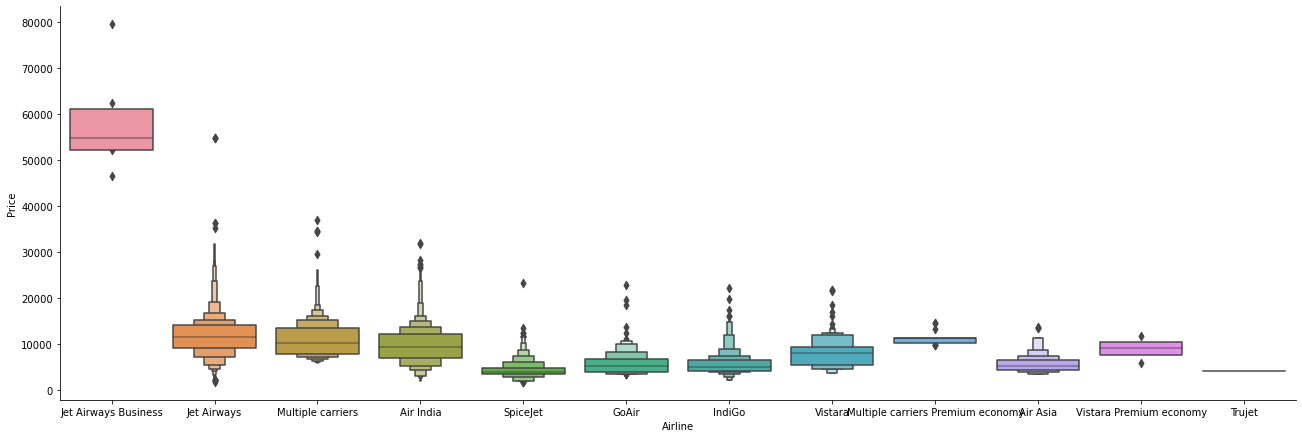

In [22]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [23]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

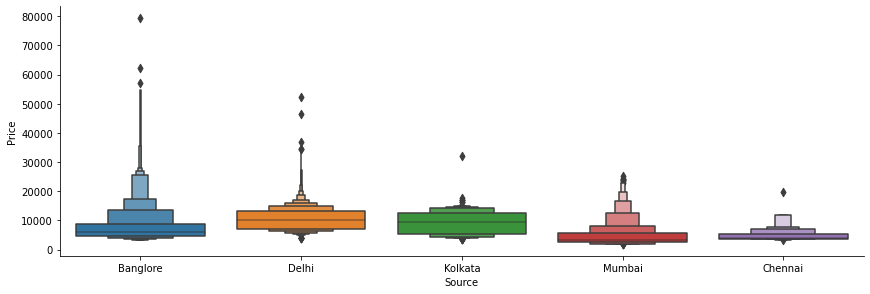

In [25]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [26]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [28]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [29]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [30]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [31]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [33]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [34]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [35]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [37]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
data_train.shape

(10682, 30)

---

## Test set

In [39]:
test_data = pd.read_excel(r"Data\Test_set.xlsx")

In [40]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [41]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [42]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [43]:
data_train.shape

(10682, 30)

In [44]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [39]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

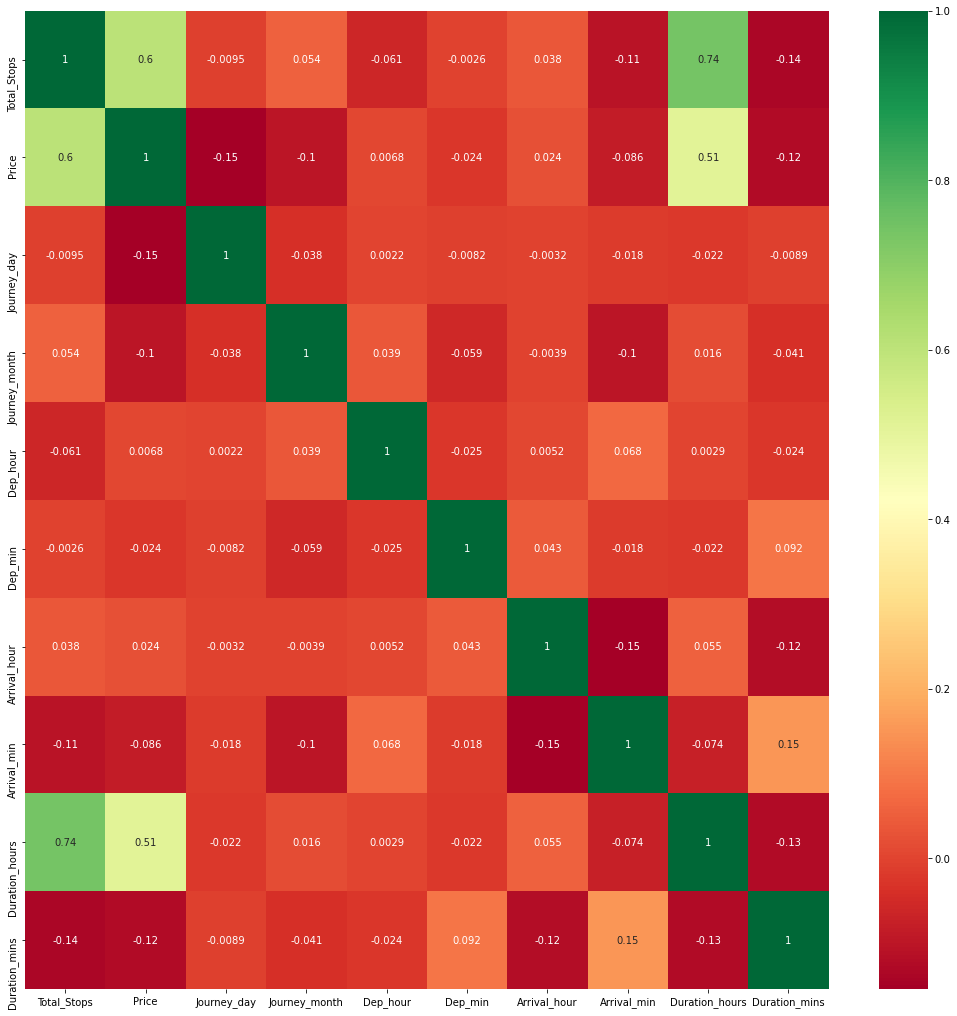

In [47]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [48]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [49]:
print(selection.feature_importances_)

[2.15972428e-01 1.43878305e-01 5.32730567e-02 2.49033458e-02
 2.11739914e-02 2.76816194e-02 1.92875685e-02 1.37941296e-01
 1.74696088e-02 9.99439789e-03 1.85947503e-03 1.64876068e-02
 1.35918579e-01 6.72510639e-02 1.94342811e-02 8.83180028e-04
 2.52163370e-03 1.23557372e-04 5.23357955e-03 7.99440270e-05
 4.59891275e-04 9.42894021e-03 3.35358175e-03 5.37580677e-03
 1.26743147e-02 1.44725474e-02 7.45304406e-03 5.02771213e-04
 2.49105840e-02]


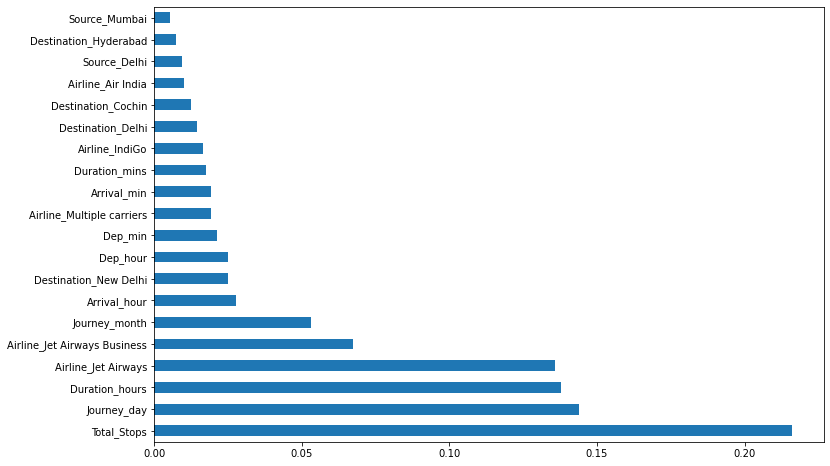

In [50]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


---

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
y_pred = reg_rf.predict(X_test)

In [54]:
reg_rf.score(X_train, y_train)

0.953772541287897

In [55]:
reg_rf.score(X_test, y_test)

0.795826451430447

C:\Anaconda3\envs\gpuenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


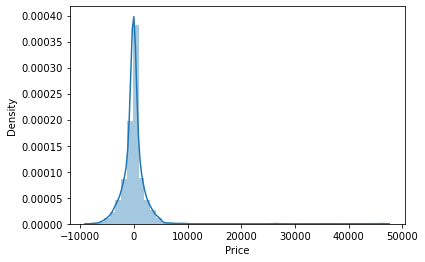

In [56]:
sns.distplot(y_test-y_pred)
plt.show()

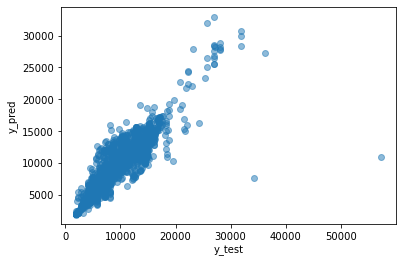

In [57]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1182.5926219474643
MSE: 4402401.554160684
RMSE: 2098.1900662620355


In [60]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [61]:
metrics.r2_score(y_test, y_pred)

0.795826451430447

---

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [68]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [69]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [70]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [72]:
prediction = rf_random.predict(X_test)

C:\Anaconda3\envs\gpuenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


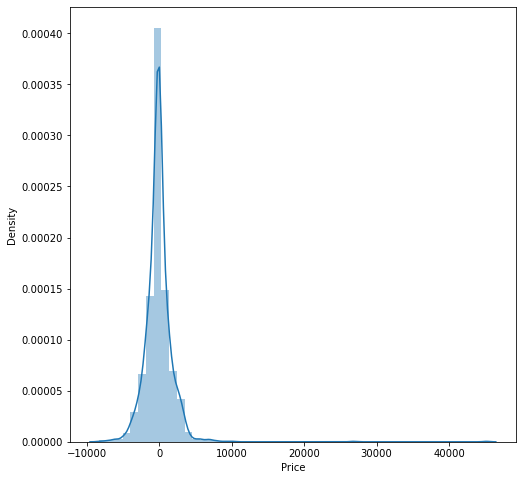

In [73]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

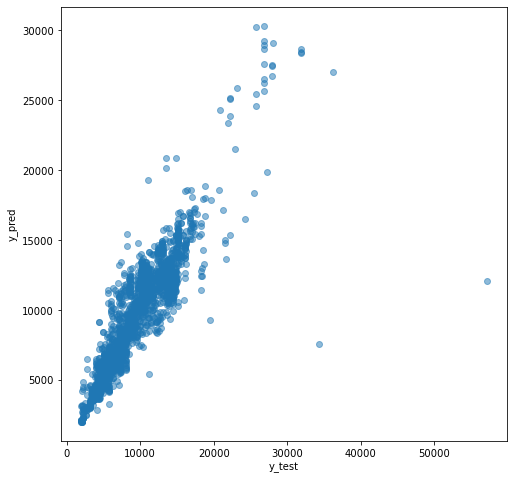

In [74]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1167.2792881262324
MSE: 4062014.208361596
RMSE: 2015.4439233979188


---

## Save the model to reuse it again

In [76]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [78]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [79]:
y_prediction = forest.predict(X_test)

In [80]:
metrics.r2_score(y_test, y_prediction)

0.7980341156008706

### Lets Build a Ann Regressot to solve the problem

1. Start with a base model
2. Increase layers
3. Tune learning rates
4. TRy to reduce overfitting

In [42]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [44]:
import pickle

with open('scaling.pickle', 'wb') as f:
    pickle.dump(scaler, f)

In [95]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("base_model.h5", save_best_only=True)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train_scaled.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss=keras.losses.mean_absolute_error,
             optimizer=keras.optimizers.SGD(),
             metrics=["mae"])

history = model.fit(x_train_scaled,y_train,
                   epochs=1000,
                   validation_data=(x_test_scaled,y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb]
                   )

Epoch 1/1000
268/268 [==============================] - 1s 3ms/step - loss: 9041.9697 - mae: 9041.9697 - val_loss: 8927.2217 - val_mae: 8927.2217
Epoch 2/1000
268/268 [==============================] - 1s 2ms/step - loss: 5737.2778 - mae: 5737.2778 - val_loss: 2107.1111 - val_mae: 2107.1111
Epoch 3/1000
268/268 [==============================] - 1s 2ms/step - loss: 1937.0775 - mae: 1937.0775 - val_loss: 1946.5442 - val_mae: 1946.5442
Epoch 4/1000
268/268 [==============================] - 0s 2ms/step - loss: 1859.1489 - mae: 1859.1489 - val_loss: 1916.9305 - val_mae: 1916.9305
Epoch 5/1000
268/268 [==============================] - 0s 2ms/step - loss: 1830.3103 - mae: 1830.3103 - val_loss: 1920.6847 - val_mae: 1920.6847
Epoch 6/1000
268/268 [==============================] - 0s 2ms/step - loss: 1813.5771 - mae: 1813.5771 - val_loss: 1864.8041 - val_mae: 1864.8041
Epoch 7/1000
268/268 [==============================] - 0s 2ms/step - loss: 1800.8201 - mae: 1800.8201 - val_loss: 1870.1158

Epoch 57/1000
268/268 [==============================] - 0s 2ms/step - loss: 1565.3705 - mae: 1565.3705 - val_loss: 1708.3593 - val_mae: 1708.3593
Epoch 58/1000
268/268 [==============================] - 0s 2ms/step - loss: 1564.0466 - mae: 1564.0466 - val_loss: 1708.8921 - val_mae: 1708.8921
Epoch 59/1000
268/268 [==============================] - 1s 2ms/step - loss: 1562.4495 - mae: 1562.4495 - val_loss: 1717.4136 - val_mae: 1717.4136
Epoch 60/1000
268/268 [==============================] - 0s 2ms/step - loss: 1561.5798 - mae: 1561.5798 - val_loss: 1681.7639 - val_mae: 1681.7639
Epoch 61/1000
268/268 [==============================] - 1s 2ms/step - loss: 1561.6534 - mae: 1561.6534 - val_loss: 1694.9926 - val_mae: 1694.9926
Epoch 62/1000
268/268 [==============================] - 2s 6ms/step - loss: 1561.5883 - mae: 1561.5883 - val_loss: 1654.7812 - val_mae: 1654.7812
Epoch 63/1000
268/268 [==============================] - 0s 2ms/step - loss: 1560.4803 - mae: 1560.4803 - val_loss: 16

268/268 [==============================] - 0s 2ms/step - loss: 1453.7961 - mae: 1453.7961 - val_loss: 1574.6526 - val_mae: 1574.6526
Epoch 168/1000
268/268 [==============================] - 1s 2ms/step - loss: 1453.8633 - mae: 1453.8633 - val_loss: 1551.5840 - val_mae: 1551.5840
Epoch 169/1000
268/268 [==============================] - 0s 2ms/step - loss: 1452.8202 - mae: 1452.8202 - val_loss: 1559.8975 - val_mae: 1559.8975
Epoch 170/1000
268/268 [==============================] - 0s 2ms/step - loss: 1452.6665 - mae: 1452.6665 - val_loss: 1551.7937 - val_mae: 1551.7937
Epoch 171/1000
268/268 [==============================] - 0s 2ms/step - loss: 1452.6962 - mae: 1452.6962 - val_loss: 1565.1151 - val_mae: 1565.1151
Epoch 172/1000
268/268 [==============================] - 1s 2ms/step - loss: 1451.2113 - mae: 1451.2113 - val_loss: 1590.3416 - val_mae: 1590.3416
Epoch 173/1000
268/268 [==============================] - 1s 2ms/step - loss: 1450.2385 - mae: 1450.2385 - val_loss: 1550.8865 

268/268 [==============================] - 0s 2ms/step - loss: 1419.2411 - mae: 1419.2411 - val_loss: 1530.0415 - val_mae: 1530.0415
Epoch 278/1000
268/268 [==============================] - 0s 2ms/step - loss: 1421.3269 - mae: 1421.3269 - val_loss: 1568.5381 - val_mae: 1568.5381
Epoch 279/1000
268/268 [==============================] - 0s 2ms/step - loss: 1422.4348 - mae: 1422.4348 - val_loss: 1547.8134 - val_mae: 1547.8134
Epoch 280/1000
268/268 [==============================] - 0s 2ms/step - loss: 1420.3545 - mae: 1420.3545 - val_loss: 1523.1865 - val_mae: 1523.1865
Epoch 281/1000
268/268 [==============================] - 0s 2ms/step - loss: 1419.8407 - mae: 1419.8407 - val_loss: 1570.9739 - val_mae: 1570.9739
Epoch 282/1000
268/268 [==============================] - 0s 2ms/step - loss: 1419.0728 - mae: 1419.0728 - val_loss: 1526.8969 - val_mae: 1526.8969
Epoch 283/1000
268/268 [==============================] - 1s 2ms/step - loss: 1419.2012 - mae: 1419.2012 - val_loss: 1525.0138 

268/268 [==============================] - 0s 2ms/step - loss: 1413.1927 - mae: 1413.1927 - val_loss: 1532.9243 - val_mae: 1532.9243
Epoch 388/1000
268/268 [==============================] - 1s 2ms/step - loss: 1412.9188 - mae: 1412.9188 - val_loss: 1543.7865 - val_mae: 1543.7865
Epoch 389/1000
268/268 [==============================] - 0s 2ms/step - loss: 1410.9899 - mae: 1410.9899 - val_loss: 1530.6926 - val_mae: 1530.6926
Epoch 390/1000
268/268 [==============================] - 0s 2ms/step - loss: 1410.6324 - mae: 1410.6324 - val_loss: 1546.7623 - val_mae: 1546.7623
Epoch 391/1000
268/268 [==============================] - 0s 2ms/step - loss: 1410.1985 - mae: 1410.1985 - val_loss: 1530.8367 - val_mae: 1530.8367
Epoch 392/1000
268/268 [==============================] - 1s 2ms/step - loss: 1409.3412 - mae: 1409.3412 - val_loss: 1567.8539 - val_mae: 1567.8539
Epoch 393/1000
268/268 [==============================] - 0s 2ms/step - loss: 1411.4535 - mae: 1411.4535 - val_loss: 1533.8829 

In [96]:
from sklearn.metrics import r2_score
y_pred_test = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train ))

0.7509158955070299
0.7569301968602313


In [97]:
# Lets complex the model
input_ = keras.layers.Input(shape=x_test_scaled.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model1 = keras.Model(inputs=[input_], outputs=[output])

checkpoint1 = keras.callbacks.ModelCheckpoint('model1.h5')
# compile the model
model1.compile(loss=keras.losses.mean_absolute_error,
             optimizer=keras.optimizers.SGD(),
             metrics=["mae"])

history1 = model1.fit(x_train_scaled,y_train,
                     epochs=1000,
                     validation_data=(x_test_scaled,y_test),
                     callbacks=[early_stopping_cb, checkpoint1])

Epoch 1/1000
268/268 [==============================] - 1s 4ms/step - loss: 4799.1562 - mae: 4799.1562 - val_loss: 11250.6436 - val_mae: 11250.6436
Epoch 2/1000
268/268 [==============================] - 1s 2ms/step - loss: 2300.7959 - mae: 2300.7959 - val_loss: 17640.4707 - val_mae: 17640.4707
Epoch 3/1000
268/268 [==============================] - 1s 2ms/step - loss: 2228.7217 - mae: 2228.7217 - val_loss: 4249.5679 - val_mae: 4249.5679
Epoch 4/1000
268/268 [==============================] - 1s 2ms/step - loss: 2212.3518 - mae: 2212.3518 - val_loss: 5563.2651 - val_mae: 5563.2651
Epoch 5/1000
268/268 [==============================] - 1s 2ms/step - loss: 2151.7642 - mae: 2151.7642 - val_loss: 6350.1890 - val_mae: 6350.1890
Epoch 6/1000
268/268 [==============================] - 1s 2ms/step - loss: 2236.7273 - mae: 2236.7273 - val_loss: 3059.9775 - val_mae: 3059.9775
Epoch 7/1000
268/268 [==============================] - 1s 2ms/step - loss: 2111.7046 - mae: 2111.7046 - val_loss: 9279.

Epoch 57/1000
268/268 [==============================] - 1s 2ms/step - loss: 1639.3143 - mae: 1639.3143 - val_loss: 3170.5813 - val_mae: 3170.5813
Epoch 58/1000
268/268 [==============================] - 1s 3ms/step - loss: 1776.1847 - mae: 1776.1847 - val_loss: 9223.5303 - val_mae: 9223.5303
Epoch 59/1000
268/268 [==============================] - 1s 2ms/step - loss: 1751.4941 - mae: 1751.4941 - val_loss: 3012.0630 - val_mae: 3012.0630
Epoch 60/1000
268/268 [==============================] - 1s 3ms/step - loss: 1631.0178 - mae: 1631.0178 - val_loss: 3160.8274 - val_mae: 3160.8274
Epoch 61/1000
268/268 [==============================] - 1s 3ms/step - loss: 1644.6932 - mae: 1644.6932 - val_loss: 2091.7441 - val_mae: 2091.7441
Epoch 62/1000
268/268 [==============================] - 1s 3ms/step - loss: 1619.6465 - mae: 1619.6465 - val_loss: 2240.9666 - val_mae: 2240.9666
Epoch 63/1000
268/268 [==============================] - 4s 15ms/step - loss: 1628.5133 - mae: 1628.5133 - val_loss: 2

In [98]:
from sklearn.metrics import r2_score
y_pred_test = model1.predict(x_test_scaled)
y_pred_train = model1.predict(x_train_scaled)
print(r2_score(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train ))

0.780109177279375
0.7729449044024729


In [52]:
# Lets perform Randomized search cv

def build_model(n_hidden=1, n_nuerons=30, learning_rate=3e-3, input_shape=x_train_scaled.shape[1:]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_nuerons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

# Lets use wrapper to wrap the function with scikit-learn
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [53]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_nuerons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=5)
rnd_search_cv.fit(x_train_scaled, y_train,
                 epochs=100,
                 validation_data=(x_test_scaled,y_test))

Epoch 1/100
214/214 [==============================] - 1s 3ms/step - loss: 62523056.0000 - val_loss: 34802360.0000
Epoch 2/100
214/214 [==============================] - 1s 3ms/step - loss: 24288564.0000 - val_loss: 16300616.0000
Epoch 3/100
214/214 [==============================] - 1s 3ms/step - loss: 13338237.0000 - val_loss: 10783334.0000
Epoch 4/100
214/214 [==============================] - 1s 3ms/step - loss: 10020046.0000 - val_loss: 9128408.0000
Epoch 5/100
214/214 [==============================] - 1s 3ms/step - loss: 8965796.0000 - val_loss: 8593032.0000
Epoch 6/100
214/214 [==============================] - 1s 3ms/step - loss: 8626700.0000 - val_loss: 8438269.0000
Epoch 7/100
214/214 [==============================] - 1s 2ms/step - loss: 8495542.0000 - val_loss: 8370288.0000
Epoch 8/100
214/214 [==============================] - 1s 3ms/step - loss: 8438970.0000 - val_loss: 8336843.5000
Epoch 9/100
214/214 [==============================] - 1s 3ms/step - loss: 8405340.0000 -

Epoch 73/100
214/214 [==============================] - 1s 3ms/step - loss: 8258748.0000 - val_loss: 8229559.0000
Epoch 74/100
214/214 [==============================] - 1s 3ms/step - loss: 8258467.5000 - val_loss: 8234236.5000
Epoch 75/100
214/214 [==============================] - 1s 3ms/step - loss: 8257980.0000 - val_loss: 8221191.5000
Epoch 76/100
214/214 [==============================] - 1s 3ms/step - loss: 8255439.0000 - val_loss: 8215097.5000
Epoch 77/100
214/214 [==============================] - 1s 3ms/step - loss: 8252346.5000 - val_loss: 8224564.0000
Epoch 78/100
214/214 [==============================] - 1s 3ms/step - loss: 8258310.0000 - val_loss: 8225912.5000
Epoch 79/100
214/214 [==============================] - 1s 3ms/step - loss: 8258372.5000 - val_loss: 8217157.5000
Epoch 80/100
214/214 [==============================] - 1s 3ms/step - loss: 8250712.5000 - val_loss: 8213074.0000
Epoch 81/100
214/214 [==============================] - 1s 3ms/step - loss: 8253531.5000

214/214 [==============================] - 1s 2ms/step - loss: 7799280.0000 - val_loss: 8334996.0000
Epoch 14/100
214/214 [==============================] - 0s 2ms/step - loss: 7792600.0000 - val_loss: 8330925.5000
Epoch 15/100
214/214 [==============================] - 1s 3ms/step - loss: 7788600.5000 - val_loss: 8317730.0000
Epoch 16/100
214/214 [==============================] - 1s 3ms/step - loss: 7780884.5000 - val_loss: 8299069.0000
Epoch 17/100
214/214 [==============================] - 1s 3ms/step - loss: 7776050.5000 - val_loss: 8298801.5000
Epoch 18/100
214/214 [==============================] - 1s 3ms/step - loss: 7770556.5000 - val_loss: 8294500.5000
Epoch 19/100
214/214 [==============================] - 1s 3ms/step - loss: 7769386.5000 - val_loss: 8295868.0000
Epoch 20/100
214/214 [==============================] - 1s 3ms/step - loss: 7763955.0000 - val_loss: 8281504.5000
Epoch 21/100
214/214 [==============================] - 1s 3ms/step - loss: 7762062.5000 - val_loss: 

Epoch 85/100
214/214 [==============================] - 1s 3ms/step - loss: 7702705.0000 - val_loss: 8247161.0000
Epoch 86/100
214/214 [==============================] - 1s 3ms/step - loss: 7701706.0000 - val_loss: 8241327.5000
Epoch 87/100
214/214 [==============================] - 1s 3ms/step - loss: 7702174.0000 - val_loss: 8248275.5000
Epoch 88/100
214/214 [==============================] - 1s 3ms/step - loss: 7702249.5000 - val_loss: 8235118.0000
Epoch 89/100
214/214 [==============================] - 1s 3ms/step - loss: 7701637.0000 - val_loss: 8236017.0000
Epoch 90/100
214/214 [==============================] - 1s 3ms/step - loss: 7700900.5000 - val_loss: 8235465.0000
Epoch 91/100
214/214 [==============================] - 1s 3ms/step - loss: 7700190.5000 - val_loss: 8249780.0000
Epoch 92/100
214/214 [==============================] - 1s 3ms/step - loss: 7700542.5000 - val_loss: 8227057.5000
Epoch 93/100
214/214 [==============================] - 1s 3ms/step - loss: 7702043.5000

214/214 [==============================] - 1s 3ms/step - loss: 7548211.5000 - val_loss: 8271094.0000
Epoch 55/100
214/214 [==============================] - 1s 3ms/step - loss: 7549320.5000 - val_loss: 8264632.5000
Epoch 56/100
214/214 [==============================] - 1s 3ms/step - loss: 7548237.0000 - val_loss: 8260690.0000
Epoch 57/100
214/214 [==============================] - 1s 3ms/step - loss: 7545550.5000 - val_loss: 8272606.0000
Epoch 58/100
214/214 [==============================] - 1s 3ms/step - loss: 7546810.5000 - val_loss: 8255610.5000
Epoch 59/100
214/214 [==============================] - 1s 3ms/step - loss: 7545869.0000 - val_loss: 8252863.0000
Epoch 60/100
214/214 [==============================] - 1s 3ms/step - loss: 7545103.0000 - val_loss: 8259246.5000
Epoch 61/100
214/214 [==============================] - 1s 3ms/step - loss: 7544323.5000 - val_loss: 8262512.0000
Epoch 62/100
214/214 [==============================] - 1s 3ms/step - loss: 7544587.0000 - val_loss: 

Epoch 95/100
214/214 [==============================] - 1s 3ms/step - loss: 8141124.0000 - val_loss: 8330919.0000
Epoch 96/100
214/214 [==============================] - 1s 3ms/step - loss: 8140461.0000 - val_loss: 8325563.5000
Epoch 97/100
214/214 [==============================] - 1s 3ms/step - loss: 8140395.0000 - val_loss: 8331564.0000
Epoch 98/100
214/214 [==============================] - 1s 3ms/step - loss: 8138807.5000 - val_loss: 8335759.5000
Epoch 99/100
214/214 [==============================] - 1s 3ms/step - loss: 8137801.5000 - val_loss: 8332344.0000
Epoch 100/100
54/54 [==============================] - 0s 2ms/step - loss: 7527830.0000
Epoch 1/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 3/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/100
214/214 [==============================] - 1s

214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 77/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 78/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 79/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 80/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 81/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 82/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 83/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 84/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 85/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 86/100
214/214 [==============================]

Epoch 61/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 62/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 63/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 64/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 65/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 66/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 67/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 68/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 69/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 70/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 71/100
214/214 [==================

Epoch 30/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 31/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 32/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 33/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 34/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 35/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 36/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 37/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 38/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 39/100
214/214 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 40/100
214/214 [==================

214/214 [==============================] - 1s 3ms/step - loss: 21818428.0000 - val_loss: 21566940.0000
Epoch 76/100
214/214 [==============================] - 1s 3ms/step - loss: 21818872.0000 - val_loss: 21565482.0000
Epoch 77/100
214/214 [==============================] - 1s 3ms/step - loss: 21818808.0000 - val_loss: 21565658.0000
Epoch 78/100
214/214 [==============================] - 1s 3ms/step - loss: 21818244.0000 - val_loss: 21564760.0000
Epoch 79/100
214/214 [==============================] - 1s 3ms/step - loss: 21818548.0000 - val_loss: 21564772.0000
Epoch 80/100
214/214 [==============================] - 1s 3ms/step - loss: 21818556.0000 - val_loss: 21566516.0000
Epoch 81/100
214/214 [==============================] - 1s 3ms/step - loss: 21818892.0000 - val_loss: 21565966.0000
Epoch 82/100
214/214 [==============================] - 1s 3ms/step - loss: 21819052.0000 - val_loss: 21565286.0000
Epoch 83/100
214/214 [==============================] - 1s 3ms/step - loss: 21818348.

Epoch 44/100
214/214 [==============================] - 1s 3ms/step - loss: 11151054209024.0000 - val_loss: 89420128583680.0000
Epoch 45/100
214/214 [==============================] - 1s 3ms/step - loss: 17863037419520.0000 - val_loss: 142385078075392.0000
Epoch 46/100
214/214 [==============================] - 1s 3ms/step - loss: 28532835090432.0000 - val_loss: 226774776545280.0000
Epoch 47/100
214/214 [==============================] - 1s 3ms/step - loss: 45551894659072.0000 - val_loss: 364471830708224.0000
Epoch 48/100
214/214 [==============================] - 1s 3ms/step - loss: 72928100089856.0000 - val_loss: 580326787121152.0000
Epoch 49/100
214/214 [==============================] - 1s 3ms/step - loss: 116057071157248.0000 - val_loss: 925512838938624.0000
Epoch 50/100
214/214 [==============================] - 1s 3ms/step - loss: 184825814188032.0000 - val_loss: 1475542725427200.0000
Epoch 51/100
214/214 [==============================] - 1s 3ms/step - loss: 295556194762752.000

54/54 [==============================] - 0s 2ms/step - loss: 379588488666307620765696.0000
Epoch 1/100
214/214 [==============================] - 1s 3ms/step - loss: 32961488.0000 - val_loss: 10823571.0000
Epoch 2/100
214/214 [==============================] - 1s 3ms/step - loss: 9214727.0000 - val_loss: 8719770.0000
Epoch 3/100
214/214 [==============================] - 1s 3ms/step - loss: 8588805.0000 - val_loss: 8849267.0000
Epoch 4/100
214/214 [==============================] - 1s 3ms/step - loss: 8560161.0000 - val_loss: 9003359.0000
Epoch 5/100
214/214 [==============================] - 1s 3ms/step - loss: 8571084.0000 - val_loss: 9497743.0000
Epoch 6/100
214/214 [==============================] - 1s 3ms/step - loss: 8667121.0000 - val_loss: 10124971.0000
Epoch 7/100
214/214 [==============================] - 1s 3ms/step - loss: 8800762.0000 - val_loss: 11267292.0000
Epoch 8/100
214/214 [==============================] - 1s 3ms/step - loss: 9005880.0000 - val_loss: 13045366.0000


214/214 [==============================] - 1s 3ms/step - loss: 4752958976.0000 - val_loss: 39017177088.0000
Epoch 28/100
214/214 [==============================] - 1s 3ms/step - loss: 7568680448.0000 - val_loss: 62103085056.0000
Epoch 29/100
214/214 [==============================] - 1s 2ms/step - loss: 12064802816.0000 - val_loss: 99414474752.0000
Epoch 30/100
214/214 [==============================] - 0s 2ms/step - loss: 19245979648.0000 - val_loss: 158183587840.0000
Epoch 31/100
214/214 [==============================] - 1s 2ms/step - loss: 30714710016.0000 - val_loss: 254064427008.0000
Epoch 32/100
214/214 [==============================] - 1s 3ms/step - loss: 49053675520.0000 - val_loss: 404687749120.0000
Epoch 33/100
214/214 [==============================] - 1s 3ms/step - loss: 78487216128.0000 - val_loss: 650852958208.0000
Epoch 34/100
214/214 [==============================] - 1s 3ms/step - loss: 125559824384.0000 - val_loss: 1037222608896.0000
Epoch 35/100
214/214 [==========

214/214 [==============================] - 1s 3ms/step - loss: 187903510577152.0000 - val_loss: 1627530880614400.0000
Epoch 51/100
214/214 [==============================] - 1s 3ms/step - loss: 300778774331392.0000 - val_loss: 2599404133416960.0000
Epoch 52/100
214/214 [==============================] - 1s 3ms/step - loss: 480383669895168.0000 - val_loss: 4152411962736640.0000
Epoch 53/100
214/214 [==============================] - 1s 3ms/step - loss: 766637368147968.0000 - val_loss: 6610002986926080.0000
Epoch 54/100
214/214 [==============================] - 1s 3ms/step - loss: 1220130415575040.0000 - val_loss: 10533610230644736.0000
Epoch 55/100
214/214 [==============================] - 1s 3ms/step - loss: 1948481841266688.0000 - val_loss: 16827001113411584.0000
Epoch 56/100
214/214 [==============================] - 1s 3ms/step - loss: 3096261787910144.0000 - val_loss: 26866757750751232.0000
Epoch 57/100
214/214 [==============================] - 1s 3ms/step - loss: 49519722013655

Epoch 81/100
214/214 [==============================] - 1s 3ms/step - loss: 8162242.5000 - val_loss: 8370332.0000
Epoch 82/100
214/214 [==============================] - 1s 3ms/step - loss: 8164049.5000 - val_loss: 8354904.5000
Epoch 83/100
214/214 [==============================] - 1s 3ms/step - loss: 8188391.5000 - val_loss: 8393345.0000
Epoch 84/100
214/214 [==============================] - 1s 4ms/step - loss: 8193517.0000 - val_loss: 8358257.0000
Epoch 85/100
214/214 [==============================] - 1s 4ms/step - loss: 8187770.5000 - val_loss: 8394667.0000
Epoch 86/100
214/214 [==============================] - 1s 4ms/step - loss: 8203503.5000 - val_loss: 8392066.0000
Epoch 87/100
214/214 [==============================] - 1s 4ms/step - loss: 8161107.5000 - val_loss: 8361825.0000
Epoch 88/100
214/214 [==============================] - 1s 4ms/step - loss: 8167186.5000 - val_loss: 8383520.0000
Epoch 89/100
214/214 [==============================] - 1s 4ms/step - loss: 8204089.0000

214/214 [==============================] - 1s 3ms/step - loss: 21250594.0000 - val_loss: 21563158.0000
Epoch 22/100
214/214 [==============================] - 1s 4ms/step - loss: 21251378.0000 - val_loss: 21563718.0000
Epoch 23/100
214/214 [==============================] - 1s 3ms/step - loss: 21251002.0000 - val_loss: 21563118.0000
Epoch 24/100
214/214 [==============================] - 1s 3ms/step - loss: 21251502.0000 - val_loss: 21563514.0000
Epoch 25/100
214/214 [==============================] - 1s 3ms/step - loss: 21251192.0000 - val_loss: 21562808.0000
Epoch 26/100
214/214 [==============================] - 1s 3ms/step - loss: 21250478.0000 - val_loss: 21562050.0000
Epoch 27/100
214/214 [==============================] - 1s 3ms/step - loss: 21250228.0000 - val_loss: 21562590.0000
Epoch 28/100
214/214 [==============================] - 1s 3ms/step - loss: 21250678.0000 - val_loss: 21562192.0000
Epoch 29/100
214/214 [==============================] - 1s 4ms/step - loss: 21250846.

Epoch 92/100
214/214 [==============================] - 1s 3ms/step - loss: 21251096.0000 - val_loss: 21563764.0000
Epoch 93/100
214/214 [==============================] - 1s 3ms/step - loss: 21250872.0000 - val_loss: 21562618.0000
Epoch 94/100
214/214 [==============================] - 1s 3ms/step - loss: 21249748.0000 - val_loss: 21562360.0000
Epoch 95/100
214/214 [==============================] - 1s 3ms/step - loss: 21246258.0000 - val_loss: 21568466.0000
Epoch 96/100
214/214 [==============================] - 1s 3ms/step - loss: 21252430.0000 - val_loss: 21563840.0000
Epoch 97/100
214/214 [==============================] - 1s 3ms/step - loss: 21251048.0000 - val_loss: 21563224.0000
Epoch 98/100
214/214 [==============================] - 1s 3ms/step - loss: 21251132.0000 - val_loss: 21563566.0000
Epoch 99/100
214/214 [==============================] - 1s 3ms/step - loss: 21251622.0000 - val_loss: 21562944.0000
Epoch 100/100
54/54 [==============================] - 0s 2ms/step - los

Epoch 49/100
214/214 [==============================] - 1s 3ms/step - loss: 20523146.0000 - val_loss: 21569064.0000
Epoch 50/100
214/214 [==============================] - 1s 3ms/step - loss: 20522504.0000 - val_loss: 21566000.0000
Epoch 51/100
214/214 [==============================] - 1s 3ms/step - loss: 20522592.0000 - val_loss: 21569356.0000
Epoch 52/100
214/214 [==============================] - 1s 3ms/step - loss: 20519290.0000 - val_loss: 21577882.0000
Epoch 53/100
214/214 [==============================] - 1s 3ms/step - loss: 20521116.0000 - val_loss: 21563890.0000
Epoch 54/100
214/214 [==============================] - 1s 4ms/step - loss: 20522686.0000 - val_loss: 21563872.0000
Epoch 55/100
214/214 [==============================] - 1s 4ms/step - loss: 20522782.0000 - val_loss: 21563560.0000
Epoch 56/100
214/214 [==============================] - 1s 3ms/step - loss: 20522142.0000 - val_loss: 21569674.0000
Epoch 57/100
214/214 [==============================] - 1s 3ms/step - lo

214/214 [==============================] - 1s 3ms/step - loss: 21819554.0000 - val_loss: 21564358.0000
Epoch 20/100
214/214 [==============================] - 1s 3ms/step - loss: 21818252.0000 - val_loss: 21568832.0000
Epoch 21/100
214/214 [==============================] - 1s 3ms/step - loss: 21819932.0000 - val_loss: 21566256.0000
Epoch 22/100
214/214 [==============================] - 1s 3ms/step - loss: 21819638.0000 - val_loss: 21563630.0000
Epoch 23/100
214/214 [==============================] - 1s 3ms/step - loss: 21819702.0000 - val_loss: 21565876.0000
Epoch 24/100
214/214 [==============================] - 1s 4ms/step - loss: 21818982.0000 - val_loss: 21563042.0000
Epoch 25/100
214/214 [==============================] - 1s 3ms/step - loss: 21820144.0000 - val_loss: 21563034.0000
Epoch 26/100
214/214 [==============================] - 1s 3ms/step - loss: 21820608.0000 - val_loss: 21564002.0000
Epoch 27/100
214/214 [==============================] - 1s 3ms/step - loss: 21817818.

Epoch 90/100
214/214 [==============================] - 1s 3ms/step - loss: 21820440.0000 - val_loss: 21566784.0000
Epoch 91/100
214/214 [==============================] - 1s 3ms/step - loss: 21819032.0000 - val_loss: 21562898.0000
Epoch 92/100
214/214 [==============================] - 1s 3ms/step - loss: 21820334.0000 - val_loss: 21563752.0000
Epoch 93/100
214/214 [==============================] - 1s 3ms/step - loss: 21819476.0000 - val_loss: 21565150.0000
Epoch 94/100
214/214 [==============================] - 1s 3ms/step - loss: 21820652.0000 - val_loss: 21565416.0000
Epoch 95/100
214/214 [==============================] - 1s 3ms/step - loss: 21819754.0000 - val_loss: 21563686.0000
Epoch 96/100
214/214 [==============================] - 1s 3ms/step - loss: 21820094.0000 - val_loss: 21562942.0000
Epoch 97/100
214/214 [==============================] - 1s 3ms/step - loss: 21820224.0000 - val_loss: 21563458.0000
Epoch 98/100
214/214 [==============================] - 1s 3ms/step - lo

Epoch 57/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 58/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 59/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 60/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 61/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 62/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 63/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 64/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 65/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 66/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 67/100
214/214 [==================

214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 12/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 13/100
214/214 [==============================] - 0s 

Epoch 59/100
214/214 [==============================] - 0s 2ms/step - loss: 21825618.0000 - val_loss: 21569086.0000
Epoch 60/100
214/214 [==============================] - 0s 2ms/step - loss: 21823612.0000 - val_loss: 21572372.0000
Epoch 61/100
214/214 [==============================] - 0s 2ms/step - loss: 21820322.0000 - val_loss: 21601292.0000
Epoch 62/100
214/214 [==============================] - 0s 2ms/step - loss: 21827260.0000 - val_loss: 21579074.0000
Epoch 63/100
214/214 [==============================] - 0s 2ms/step - loss: 21826664.0000 - val_loss: 21571126.0000
Epoch 64/100
214/214 [==============================] - 0s 2ms/step - loss: 21828862.0000 - val_loss: 21564396.0000
Epoch 65/100
214/214 [==============================] - 0s 2ms/step - loss: 21818626.0000 - val_loss: 21598692.0000
Epoch 66/100
214/214 [==============================] - 0s 2ms/step - loss: 21828708.0000 - val_loss: 21570744.0000
Epoch 67/100
214/214 [==============================] - 0s 2ms/step - lo

Epoch 35/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 36/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 37/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 38/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 39/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 40/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 41/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 42/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 43/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 44/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 45/100
214/214 [==================

Epoch 4/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
214/214 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 12/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 13/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 14/100
214/214 [========================

Epoch 74/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 75/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 76/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 77/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 78/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 79/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 80/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 81/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 82/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 83/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 84/100
214/214 [==================

214/214 [==============================] - 0s 2ms/step - loss: 21883200.0000 - val_loss: 21562504.0000
Epoch 33/100
214/214 [==============================] - 0s 2ms/step - loss: 21883306.0000 - val_loss: 21562354.0000
Epoch 34/100
214/214 [==============================] - 0s 2ms/step - loss: 21883468.0000 - val_loss: 21562848.0000
Epoch 35/100
214/214 [==============================] - 0s 2ms/step - loss: 21883962.0000 - val_loss: 21562414.0000
Epoch 36/100
214/214 [==============================] - 0s 2ms/step - loss: 21883934.0000 - val_loss: 21562156.0000
Epoch 37/100
214/214 [==============================] - 0s 2ms/step - loss: 21883470.0000 - val_loss: 21562288.0000
Epoch 38/100
214/214 [==============================] - 0s 2ms/step - loss: 21883076.0000 - val_loss: 21562100.0000
Epoch 39/100
214/214 [==============================] - 0s 2ms/step - loss: 21883396.0000 - val_loss: 21562074.0000
Epoch 40/100
214/214 [==============================] - 0s 2ms/step - loss: 21883562.

Epoch 2/100
214/214 [==============================] - 0s 2ms/step - loss: 47919116303647339087659008.0000 - val_loss: 14683023751469967414919168.0000
Epoch 3/100
214/214 [==============================] - 0s 2ms/step - loss: 6334518528269986870329344.0000 - val_loss: 1940975923038132027523072.0000
Epoch 4/100
214/214 [==============================] - 0s 2ms/step - loss: 837372004885129651552256.0000 - val_loss: 256581509914350678179840.0000
Epoch 5/100
214/214 [==============================] - 0s 2ms/step - loss: 110693696017962524213248.0000 - val_loss: 33917950866416161783808.0000
Epoch 6/100
214/214 [==============================] - 0s 2ms/step - loss: 14632805427076250206208.0000 - val_loss: 4483675421144032215040.0000
Epoch 7/100
214/214 [==============================] - 0s 2ms/step - loss: 1934334742764925747200.0000 - val_loss: 592704743578139623424.0000
Epoch 8/100
214/214 [==============================] - 0s 2ms/step - loss: 255702899144609759232.0000 - val_loss: 7835056

214/214 [==============================] - 0s 2ms/step - loss: 20483102.0000 - val_loss: 21569974.0000
Epoch 37/100
214/214 [==============================] - 0s 2ms/step - loss: 20484024.0000 - val_loss: 21569030.0000
Epoch 38/100
214/214 [==============================] - 0s 2ms/step - loss: 20483784.0000 - val_loss: 21567946.0000
Epoch 39/100
214/214 [==============================] - 0s 2ms/step - loss: 20483444.0000 - val_loss: 21567958.0000
Epoch 40/100
214/214 [==============================] - 0s 2ms/step - loss: 20483270.0000 - val_loss: 21565512.0000
Epoch 41/100
214/214 [==============================] - 0s 2ms/step - loss: 20483708.0000 - val_loss: 21567608.0000
Epoch 42/100
214/214 [==============================] - 0s 2ms/step - loss: 20484218.0000 - val_loss: 21566512.0000
Epoch 43/100
214/214 [==============================] - 0s 2ms/step - loss: 20482956.0000 - val_loss: 21568818.0000
Epoch 44/100
214/214 [==============================] - 0s 2ms/step - loss: 20483940.

214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 93/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 94/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 95/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 96/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 97/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 98/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 99/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 100/100
54/54 [==============================] - 0s 1ms/step - loss: nan
Epoch 1/100
214/214 [==============================] - 0s 2ms/step - loss: 53136242909317948185247744.0000 - val_loss: 9886470786989739212800.0000
Epoch 2/100
214/214

214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 38/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 39/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 40/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 41/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 42/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 43/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 44/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 45/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 46/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 47/100
214/214 [==============================]

Epoch 4/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 11/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 12/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 13/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 14/100
214/214 [========================

Epoch 74/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 75/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 76/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 77/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 78/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 79/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 80/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 81/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 82/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 83/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 84/100
214/214 [==================

Epoch 43/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 44/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 45/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 46/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 47/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 48/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 49/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 50/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 51/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 52/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 53/100
214/214 [==================

Epoch 12/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 13/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 14/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 15/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 16/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 17/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 18/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 19/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 20/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 21/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 22/100
214/214 [==================

214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 82/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 83/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 84/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 85/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 86/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 87/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 88/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 89/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 90/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 91/100
214/214 [==============================]

Epoch 66/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 67/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 68/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 69/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 70/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 71/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 72/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 73/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 74/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 75/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 76/100
214/214 [==================

214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 33/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 34/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 35/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 36/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 37/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 38/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 39/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 40/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 41/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 42/100
214/214 [==============================]

Epoch 17/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 18/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 19/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 20/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 21/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 22/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 23/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 24/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 25/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 26/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 27/100
214/214 [==================

214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 87/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 88/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 89/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 90/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 91/100
214/214 [==============================] - ETA: 0s - loss: n - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 92/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 93/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 94/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 95/100
214/214 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 96/100
214/214 [===========

C:\Anaconda3\envs\gpuenv\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-8.10751360e+06             nan -8.46408148e+22             nan
             nan             nan             nan             nan
             nan             nan]
  warnings.warn(


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002794A2380A0>, as the constructor either does not set or modifies parameter learning_rate

In [54]:
rnd_search_cv.best_params_

{'learning_rate': 0.0013782568364911828, 'n_hidden': 0, 'n_nuerons': 79}

In [55]:
rnd_search_cv.best_score_

-8107513.6

In [57]:
# Base model-2

early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model2.h5", save_best_only=True)

model2 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=x_train_scaled.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model2.compile(loss=keras.losses.mean_absolute_error,
             optimizer=keras.optimizers.Adam(),
             metrics=["mae"])

history2 = model2.fit(x_train_scaled,y_train,
                   epochs=1000,
                   validation_data=(x_test_scaled,y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb]
                   )

Epoch 1/1000
268/268 [==============================] - 1s 4ms/step - loss: 9032.1924 - mae: 9032.1924 - val_loss: 8932.4297 - val_mae: 8932.4297
Epoch 2/1000
268/268 [==============================] - 1s 2ms/step - loss: 8306.5215 - mae: 8306.5215 - val_loss: 7416.6787 - val_mae: 7416.6787
Epoch 3/1000
268/268 [==============================] - 1s 2ms/step - loss: 5939.6489 - mae: 5939.6489 - val_loss: 4423.9946 - val_mae: 4423.9946
Epoch 4/1000
268/268 [==============================] - 1s 2ms/step - loss: 3216.9910 - mae: 3216.9910 - val_loss: 2465.8599 - val_mae: 2465.8599
Epoch 5/1000
268/268 [==============================] - 1s 2ms/step - loss: 2293.3569 - mae: 2293.3569 - val_loss: 2216.0251 - val_mae: 2216.0251
Epoch 6/1000
268/268 [==============================] - 1s 2ms/step - loss: 2133.9988 - mae: 2133.9988 - val_loss: 2125.9165 - val_mae: 2125.9165
Epoch 7/1000
268/268 [==============================] - 1s 2ms/step - loss: 2055.1765 - mae: 2055.1765 - val_loss: 2072.1187

Epoch 57/1000
268/268 [==============================] - 1s 2ms/step - loss: 1662.5415 - mae: 1662.5415 - val_loss: 1719.1923 - val_mae: 1719.1923
Epoch 58/1000
268/268 [==============================] - 0s 2ms/step - loss: 1659.4038 - mae: 1659.4038 - val_loss: 1721.2903 - val_mae: 1721.2903
Epoch 59/1000
268/268 [==============================] - 1s 2ms/step - loss: 1656.7361 - mae: 1656.7361 - val_loss: 1721.6589 - val_mae: 1721.6589
Epoch 60/1000
268/268 [==============================] - 4s 16ms/step - loss: 1656.3243 - mae: 1656.3243 - val_loss: 1716.8005 - val_mae: 1716.8005
Epoch 61/1000
268/268 [==============================] - 1s 3ms/step - loss: 1653.3484 - mae: 1653.3484 - val_loss: 1711.5839 - val_mae: 1711.5839
Epoch 62/1000
268/268 [==============================] - 1s 2ms/step - loss: 1651.3530 - mae: 1651.3530 - val_loss: 1709.2083 - val_mae: 1709.2083
Epoch 63/1000
268/268 [==============================] - 1s 2ms/step - loss: 1649.4594 - mae: 1649.4594 - val_loss: 1

268/268 [==============================] - 1s 2ms/step - loss: 1506.6161 - mae: 1506.6161 - val_loss: 1600.9099 - val_mae: 1600.9099
Epoch 168/1000
268/268 [==============================] - 0s 2ms/step - loss: 1505.2449 - mae: 1505.2449 - val_loss: 1605.1730 - val_mae: 1605.1730
Epoch 169/1000
268/268 [==============================] - 1s 4ms/step - loss: 1504.6956 - mae: 1504.6956 - val_loss: 1598.7914 - val_mae: 1598.7914
Epoch 170/1000
268/268 [==============================] - 3s 11ms/step - loss: 1503.4857 - mae: 1503.4857 - val_loss: 1598.2031 - val_mae: 1598.2031
Epoch 171/1000
268/268 [==============================] - 1s 2ms/step - loss: 1502.2345 - mae: 1502.2345 - val_loss: 1600.2708 - val_mae: 1600.2708
Epoch 172/1000
268/268 [==============================] - 1s 3ms/step - loss: 1501.7748 - mae: 1501.7748 - val_loss: 1595.9406 - val_mae: 1595.9406
Epoch 173/1000
268/268 [==============================] - 1s 4ms/step - loss: 1499.7306 - mae: 1499.7306 - val_loss: 1594.0157

268/268 [==============================] - ETA: 0s - loss: 1409.4716 - mae: 1409.471 - 0s 2ms/step - loss: 1413.2142 - mae: 1413.2142 - val_loss: 1507.1671 - val_mae: 1507.1671
Epoch 278/1000
268/268 [==============================] - 0s 2ms/step - loss: 1412.0236 - mae: 1412.0236 - val_loss: 1508.0874 - val_mae: 1508.0874
Epoch 279/1000
268/268 [==============================] - 0s 2ms/step - loss: 1411.3914 - mae: 1411.3914 - val_loss: 1508.1777 - val_mae: 1508.1777
Epoch 280/1000
268/268 [==============================] - 0s 2ms/step - loss: 1411.6226 - mae: 1411.6226 - val_loss: 1507.5436 - val_mae: 1507.5436
Epoch 281/1000
268/268 [==============================] - 1s 2ms/step - loss: 1410.6750 - mae: 1410.6750 - val_loss: 1505.9658 - val_mae: 1505.9658
Epoch 282/1000
268/268 [==============================] - 0s 2ms/step - loss: 1409.4893 - mae: 1409.4893 - val_loss: 1511.0035 - val_mae: 1511.0035
Epoch 283/1000
268/268 [==============================] - 0s 2ms/step - loss: 1409.

268/268 [==============================] - 0s 2ms/step - loss: 1368.1370 - mae: 1368.1370 - val_loss: 1475.4536 - val_mae: 1475.4536
Epoch 388/1000
268/268 [==============================] - 0s 2ms/step - loss: 1367.2178 - mae: 1367.2178 - val_loss: 1468.1299 - val_mae: 1468.1299
Epoch 389/1000
268/268 [==============================] - 0s 2ms/step - loss: 1367.8514 - mae: 1367.8514 - val_loss: 1468.6074 - val_mae: 1468.6074
Epoch 390/1000
268/268 [==============================] - 0s 2ms/step - loss: 1367.1731 - mae: 1367.1731 - val_loss: 1469.2323 - val_mae: 1469.2323
Epoch 391/1000
268/268 [==============================] - 0s 2ms/step - loss: 1366.8691 - mae: 1366.8691 - val_loss: 1468.1925 - val_mae: 1468.1925
Epoch 392/1000
268/268 [==============================] - 1s 2ms/step - loss: 1366.4330 - mae: 1366.4330 - val_loss: 1470.7457 - val_mae: 1470.7457
Epoch 393/1000
268/268 [==============================] - 0s 2ms/step - loss: 1365.8402 - mae: 1365.8402 - val_loss: 1473.1036 

268/268 [==============================] - 0s 2ms/step - loss: 1337.4325 - mae: 1337.4325 - val_loss: 1444.0907 - val_mae: 1444.0907
Epoch 498/1000
268/268 [==============================] - 0s 2ms/step - loss: 1337.2909 - mae: 1337.2909 - val_loss: 1446.1807 - val_mae: 1446.1807
Epoch 499/1000
268/268 [==============================] - 1s 2ms/step - loss: 1337.5000 - mae: 1337.5000 - val_loss: 1443.4122 - val_mae: 1443.4122
Epoch 500/1000
268/268 [==============================] - 0s 2ms/step - loss: 1336.5687 - mae: 1336.5687 - val_loss: 1445.1926 - val_mae: 1445.1926
Epoch 501/1000
268/268 [==============================] - 3s 11ms/step - loss: 1336.7704 - mae: 1336.7704 - val_loss: 1442.3678 - val_mae: 1442.3678
Epoch 502/1000
268/268 [==============================] - 1s 4ms/step - loss: 1335.3702 - mae: 1335.3702 - val_loss: 1440.4915 - val_mae: 1440.4915
Epoch 503/1000
268/268 [==============================] - 0s 2ms/step - loss: 1336.1610 - mae: 1336.1610 - val_loss: 1441.4374

268/268 [==============================] - 0s 2ms/step - loss: 1308.3077 - mae: 1308.3077 - val_loss: 1421.3391 - val_mae: 1421.3391
Epoch 608/1000
268/268 [==============================] - 1s 2ms/step - loss: 1308.3060 - mae: 1308.3060 - val_loss: 1416.6489 - val_mae: 1416.6489
Epoch 609/1000
268/268 [==============================] - 1s 5ms/step - loss: 1307.0850 - mae: 1307.0850 - val_loss: 1414.5861 - val_mae: 1414.5861
Epoch 610/1000
268/268 [==============================] - 0s 2ms/step - loss: 1306.8595 - mae: 1306.8595 - val_loss: 1417.0266 - val_mae: 1417.0266
Epoch 611/1000
268/268 [==============================] - 0s 2ms/step - loss: 1305.8074 - mae: 1305.8074 - val_loss: 1416.3938 - val_mae: 1416.3938
Epoch 612/1000
268/268 [==============================] - 0s 2ms/step - loss: 1305.7267 - mae: 1305.7267 - val_loss: 1416.0217 - val_mae: 1416.0217
Epoch 613/1000
268/268 [==============================] - 0s 2ms/step - loss: 1305.7118 - mae: 1305.7118 - val_loss: 1417.6846 

268/268 [==============================] - 1s 3ms/step - loss: 1282.3834 - mae: 1282.3834 - val_loss: 1388.7358 - val_mae: 1388.7358
Epoch 718/1000
268/268 [==============================] - 0s 2ms/step - loss: 1281.6134 - mae: 1281.6134 - val_loss: 1389.4838 - val_mae: 1389.4838
Epoch 719/1000
268/268 [==============================] - 1s 2ms/step - loss: 1281.6368 - mae: 1281.6368 - val_loss: 1388.9403 - val_mae: 1388.9403
Epoch 720/1000
268/268 [==============================] - 1s 3ms/step - loss: 1281.9705 - mae: 1281.9705 - val_loss: 1388.2291 - val_mae: 1388.2291
Epoch 721/1000
268/268 [==============================] - 1s 3ms/step - loss: 1280.8959 - mae: 1280.8959 - val_loss: 1385.3960 - val_mae: 1385.3960
Epoch 722/1000
268/268 [==============================] - 0s 2ms/step - loss: 1280.2485 - mae: 1280.2485 - val_loss: 1387.7417 - val_mae: 1387.7417
Epoch 723/1000
268/268 [==============================] - 0s 2ms/step - loss: 1281.2207 - mae: 1281.2207 - val_loss: 1389.0632 

268/268 [==============================] - 0s 2ms/step - loss: 1261.2825 - mae: 1261.2825 - val_loss: 1369.1660 - val_mae: 1369.1660
Epoch 828/1000
268/268 [==============================] - 0s 2ms/step - loss: 1261.3289 - mae: 1261.3289 - val_loss: 1370.5551 - val_mae: 1370.5551
Epoch 829/1000
268/268 [==============================] - 0s 2ms/step - loss: 1260.6384 - mae: 1260.6384 - val_loss: 1371.1965 - val_mae: 1371.1965
Epoch 830/1000
268/268 [==============================] - 0s 2ms/step - loss: 1261.2734 - mae: 1261.2734 - val_loss: 1371.9700 - val_mae: 1371.9700
Epoch 831/1000
268/268 [==============================] - 0s 2ms/step - loss: 1261.6965 - mae: 1261.6965 - val_loss: 1368.8384 - val_mae: 1368.8384
Epoch 832/1000
268/268 [==============================] - 0s 2ms/step - loss: 1261.2982 - mae: 1261.2982 - val_loss: 1368.6528 - val_mae: 1368.6528
Epoch 833/1000
268/268 [==============================] - 1s 2ms/step - loss: 1260.1978 - mae: 1260.1978 - val_loss: 1368.2744 

268/268 [==============================] - 0s 2ms/step - loss: 1244.3911 - mae: 1244.3911 - val_loss: 1362.9336 - val_mae: 1362.9336
Epoch 938/1000
268/268 [==============================] - 0s 2ms/step - loss: 1243.7069 - mae: 1243.7069 - val_loss: 1357.5443 - val_mae: 1357.5443
Epoch 939/1000
268/268 [==============================] - 0s 2ms/step - loss: 1244.0222 - mae: 1244.0222 - val_loss: 1357.4236 - val_mae: 1357.4236
Epoch 940/1000
268/268 [==============================] - 1s 2ms/step - loss: 1243.7725 - mae: 1243.7725 - val_loss: 1355.1501 - val_mae: 1355.1501
Epoch 941/1000
268/268 [==============================] - 1s 3ms/step - loss: 1243.4374 - mae: 1243.4374 - val_loss: 1354.8702 - val_mae: 1354.8702
Epoch 942/1000
268/268 [==============================] - 0s 2ms/step - loss: 1242.9135 - mae: 1242.9135 - val_loss: 1356.9854 - val_mae: 1356.9854
Epoch 943/1000
268/268 [==============================] - 0s 2ms/step - loss: 1243.2717 - mae: 1243.2717 - val_loss: 1356.7086 

In [58]:
from sklearn import metrics
y_pred_model2 = model2.predict(x_test_scaled)
print(metrics.r2_score(y_test, y_pred_model2))

0.7912227587986583


In [61]:
history2.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [69]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    
    plt.style.use('fivethirtyeight')
    plt.plot(epochs, loss, color="green", label="loss")
    plt.plot(epochs, val_loss, color="red", label="val_loss")
    plt.legend()
    plt.show()

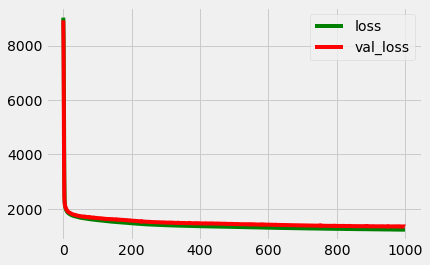

In [71]:
plot_loss_curves(history2)

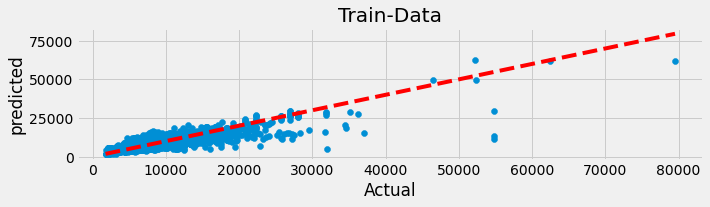

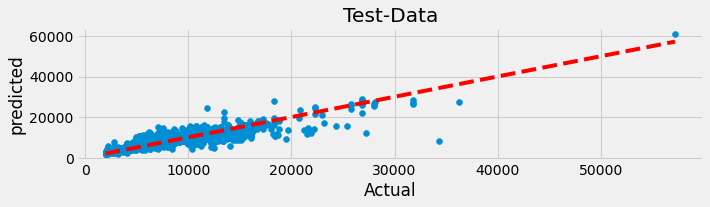

In [86]:
# Plot the prediction Curve
def plot_prediction_curve(model, train_data, test_data, train_target, test_target):
    
    # plot the training curve
    plt.figure(figsize=(10,5))
    plt.subplot(2,1,1)
    train_predict = model.predict(train_data)
    plt.scatter(train_target, train_predict)
    plt.plot([train_target.min(),train_target.max()], [train_target.min(),train_target.max()],
            color="red", linestyle="dashed")
    plt.title("Train-Data")
    plt.xlabel("Actual")
    plt.ylabel("predicted")
    plt.show()
    
    # plotting the test curve
    plt.figure(figsize=(10,5))
    plt.subplot(2,1,2)
    test_predict = model.predict(test_data)
    plt.scatter(test_target, test_predict)
    plt.plot([test_target.min(),test_target.max()], [test_target.min(),test_target.max()],
            color="red", linestyle="dashed")
    plt.title("Test-Data")
    plt.xlabel("Actual")
    plt.ylabel("predicted")
    plt.show()
    
plot_prediction_curve(model2, x_train_scaled, x_test_scaled, y_train, y_test) 

In [65]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model3.h5", save_best_only=True)

model_3 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=x_train_scaled.shape[1:]),
    keras.layers.Dense(120, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(120, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(120, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(1)
])

model_3.compile(loss="mae",
               optimizer="adam")

history3 = model_3.fit(x_train_scaled, y_train,
                      epochs=1000,
                      validation_data=(x_test_scaled,y_test),
                      callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/1000
268/268 [==============================] - 1s 4ms/step - loss: 4731.4985 - val_loss: 2039.3875
Epoch 2/1000
268/268 [==============================] - 1s 3ms/step - loss: 1893.6702 - val_loss: 1973.1547
Epoch 3/1000
268/268 [==============================] - 1s 3ms/step - loss: 1795.8444 - val_loss: 1828.6400
Epoch 4/1000
268/268 [==============================] - 1s 3ms/step - loss: 1740.8877 - val_loss: 1788.9048
Epoch 5/1000
268/268 [==============================] - 1s 3ms/step - loss: 1704.8369 - val_loss: 1768.1033
Epoch 6/1000
268/268 [==============================] - 1s 3ms/step - loss: 1679.2148 - val_loss: 1736.8866
Epoch 7/1000
268/268 [==============================] - 1s 3ms/step - loss: 1659.2939 - val_loss: 1712.5891
Epoch 8/1000
268/268 [==============================] - 1s 3ms/step - loss: 1636.7014 - val_loss: 1712.8672
Epoch 9/1000
268/268 [==============================] - 1s 3ms/step - loss: 1623.4193 - val_loss: 1695.0995
Epoch 10/1000
268/268 [=====

Epoch 72/1000
268/268 [==============================] - 1s 3ms/step - loss: 1284.8136 - val_loss: 1399.3871
Epoch 73/1000
268/268 [==============================] - 1s 3ms/step - loss: 1281.6333 - val_loss: 1381.3678
Epoch 74/1000
268/268 [==============================] - 1s 3ms/step - loss: 1276.4747 - val_loss: 1403.2753
Epoch 75/1000
268/268 [==============================] - 1s 3ms/step - loss: 1271.1237 - val_loss: 1380.8864
Epoch 76/1000
268/268 [==============================] - 1s 3ms/step - loss: 1269.0372 - val_loss: 1404.7603
Epoch 77/1000
268/268 [==============================] - 1s 3ms/step - loss: 1268.6263 - val_loss: 1415.4470
Epoch 78/1000
268/268 [==============================] - 1s 3ms/step - loss: 1269.2977 - val_loss: 1406.4526
Epoch 79/1000
268/268 [==============================] - 1s 3ms/step - loss: 1264.1536 - val_loss: 1384.4707
Epoch 80/1000
268/268 [==============================] - 1s 3ms/step - loss: 1256.4128 - val_loss: 1375.3528
Epoch 81/1000
268/2

268/268 [==============================] - 1s 3ms/step - loss: 1091.2363 - val_loss: 1294.3662
Epoch 221/1000
268/268 [==============================] - 1s 3ms/step - loss: 1076.2277 - val_loss: 1297.6975
Epoch 222/1000
268/268 [==============================] - 1s 3ms/step - loss: 1081.5504 - val_loss: 1278.4834
Epoch 223/1000
268/268 [==============================] - 1s 3ms/step - loss: 1068.1860 - val_loss: 1304.2253
Epoch 224/1000
268/268 [==============================] - 1s 3ms/step - loss: 1068.5140 - val_loss: 1282.6858
Epoch 225/1000
268/268 [==============================] - 1s 3ms/step - loss: 1069.5490 - val_loss: 1281.0840
Epoch 226/1000
268/268 [==============================] - 1s 3ms/step - loss: 1070.4482 - val_loss: 1297.3822
Epoch 227/1000
268/268 [==============================] - 1s 3ms/step - loss: 1070.9705 - val_loss: 1337.1893
Epoch 228/1000
268/268 [==============================] - 1s 3ms/step - loss: 1077.7626 - val_loss: 1300.0494
Epoch 229/1000
268/268 [=

268/268 [==============================] - 1s 3ms/step - loss: 1009.0485 - val_loss: 1268.5002
Epoch 369/1000
268/268 [==============================] - 1s 3ms/step - loss: 989.3969 - val_loss: 1276.8958
Epoch 370/1000
268/268 [==============================] - 1s 3ms/step - loss: 987.8340 - val_loss: 1265.1122
Epoch 371/1000
268/268 [==============================] - 1s 3ms/step - loss: 988.7106 - val_loss: 1292.3815
Epoch 372/1000
268/268 [==============================] - 1s 3ms/step - loss: 997.6790 - val_loss: 1242.3104
Epoch 373/1000
268/268 [==============================] - 1s 3ms/step - loss: 985.7992 - val_loss: 1261.3607
Epoch 374/1000
268/268 [==============================] - 1s 3ms/step - loss: 982.9454 - val_loss: 1246.5267
Epoch 375/1000
268/268 [==============================] - 1s 3ms/step - loss: 995.1804 - val_loss: 1243.7720
Epoch 376/1000
268/268 [==============================] - 1s 3ms/step - loss: 991.0505 - val_loss: 1242.7544
Epoch 377/1000
268/268 [=========

In [68]:
from sklearn.metrics import r2_score
y_test_predict = model_3.predict(x_test_scaled)
y_train_predict = model_3.predict(x_train_scaled)
print(r2_score(y_train, y_train_predict))
print(r2_score(y_test, y_test_predict))

0.8576572118595593
0.8158083936492445


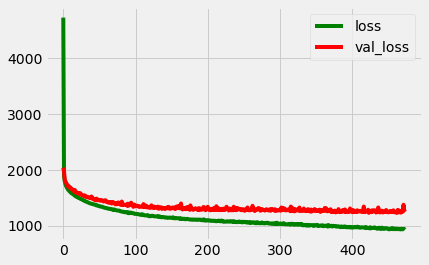

In [70]:
plot_loss_curves(history3)

In [73]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model4.h5", save_best_only=True)

model4 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=x_train_scaled.shape[1:]),
    keras.layers.Dense(120, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(120, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(120, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(1)
])

model4.compile(loss="mae",
              optimizer="adam")

history4 = model4.fit(x_train_scaled, y_train,
                      epochs=1000,
                      validation_data=(x_test_scaled,y_test),
                      callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/1000
268/268 [==============================] - 1s 4ms/step - loss: 4785.9429 - val_loss: 2048.1196
Epoch 2/1000
268/268 [==============================] - 1s 4ms/step - loss: 1905.5286 - val_loss: 1902.3654
Epoch 3/1000
268/268 [==============================] - 1s 4ms/step - loss: 1813.9731 - val_loss: 1843.2336
Epoch 4/1000
268/268 [==============================] - 1s 4ms/step - loss: 1762.1338 - val_loss: 1809.4662
Epoch 5/1000
268/268 [==============================] - 1s 4ms/step - loss: 1727.0056 - val_loss: 1780.0306
Epoch 6/1000
268/268 [==============================] - 1s 4ms/step - loss: 1696.2252 - val_loss: 1757.2061
Epoch 7/1000
268/268 [==============================] - 1s 4ms/step - loss: 1673.9757 - val_loss: 1736.0780
Epoch 8/1000
268/268 [==============================] - 1s 4ms/step - loss: 1649.9581 - val_loss: 1745.2913
Epoch 9/1000
268/268 [==============================] - 1s 4ms/step - loss: 1638.0621 - val_loss: 1700.1022
Epoch 10/1000
268/268 [=====

Epoch 76/1000
268/268 [==============================] - 1s 3ms/step - loss: 1240.0406 - val_loss: 1380.7377
Epoch 77/1000
268/268 [==============================] - 1s 4ms/step - loss: 1236.7194 - val_loss: 1369.5708
Epoch 78/1000
268/268 [==============================] - 1s 3ms/step - loss: 1239.4320 - val_loss: 1379.3536
Epoch 79/1000
268/268 [==============================] - 1s 3ms/step - loss: 1235.0906 - val_loss: 1400.6027
Epoch 80/1000
268/268 [==============================] - 1s 4ms/step - loss: 1222.5919 - val_loss: 1360.0574
Epoch 81/1000
268/268 [==============================] - 1s 3ms/step - loss: 1224.0166 - val_loss: 1391.5308
Epoch 82/1000
268/268 [==============================] - 1s 4ms/step - loss: 1222.7380 - val_loss: 1351.4019
Epoch 83/1000
268/268 [==============================] - 1s 3ms/step - loss: 1222.9904 - val_loss: 1371.6089
Epoch 84/1000
268/268 [==============================] - 1s 3ms/step - loss: 1217.4625 - val_loss: 1356.0240
Epoch 85/1000
268/2

268/268 [==============================] - 1s 3ms/step - loss: 1042.6997 - val_loss: 1273.5476
Epoch 225/1000
268/268 [==============================] - 1s 4ms/step - loss: 1033.3823 - val_loss: 1293.8196
Epoch 226/1000
268/268 [==============================] - 1s 4ms/step - loss: 1034.3579 - val_loss: 1272.0002
Epoch 227/1000
268/268 [==============================] - 1s 3ms/step - loss: 1028.8132 - val_loss: 1284.3907
Epoch 228/1000
268/268 [==============================] - 1s 3ms/step - loss: 1040.5419 - val_loss: 1285.9286
Epoch 229/1000
268/268 [==============================] - 1s 3ms/step - loss: 1033.8348 - val_loss: 1272.5822
Epoch 230/1000
268/268 [==============================] - 1s 3ms/step - loss: 1032.0625 - val_loss: 1273.0153
Epoch 231/1000
268/268 [==============================] - 1s 3ms/step - loss: 1031.6943 - val_loss: 1278.8262
Epoch 232/1000
268/268 [==============================] - 1s 3ms/step - loss: 1032.9340 - val_loss: 1269.0193
Epoch 233/1000
268/268 [=

268/268 [==============================] - 1s 3ms/step - loss: 946.3829 - val_loss: 1277.8895
Epoch 374/1000
268/268 [==============================] - 1s 3ms/step - loss: 961.2791 - val_loss: 1277.3442
Epoch 375/1000
268/268 [==============================] - 1s 3ms/step - loss: 956.8840 - val_loss: 1280.1718
Epoch 376/1000
268/268 [==============================] - 1s 3ms/step - loss: 952.3241 - val_loss: 1261.2743
Epoch 377/1000
268/268 [==============================] - 1s 3ms/step - loss: 954.4027 - val_loss: 1265.2128
Epoch 378/1000
268/268 [==============================] - 1s 3ms/step - loss: 950.9961 - val_loss: 1256.0258
Epoch 379/1000
268/268 [==============================] - 1s 3ms/step - loss: 949.6396 - val_loss: 1258.4735
Epoch 380/1000
268/268 [==============================] - 1s 3ms/step - loss: 949.8917 - val_loss: 1280.9214
Epoch 381/1000
268/268 [==============================] - 1s 3ms/step - loss: 946.2362 - val_loss: 1273.7476
Epoch 382/1000
268/268 [==========

In [75]:
from sklearn.metrics import r2_score
y_test_predict = model4.predict(x_test_scaled)
y_train_predict = model4.predict(x_train_scaled)
print(r2_score(y_train, y_train_predict))
print(r2_score(y_test, y_test_predict))

0.8583509848830604
0.8138359611916897


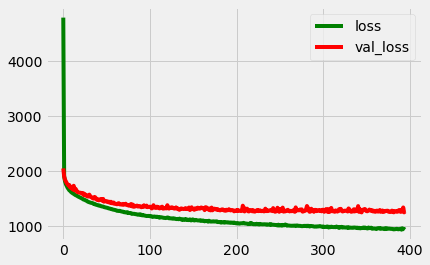

In [76]:
plot_loss_curves(history4)

In [77]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model5.h5", save_best_only=True)

model5 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=x_train_scaled.shape[1:]),
    keras.layers.Dense(120, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(120, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(120, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(alpha=0.2),
    keras.layers.Dense(1)
])

model5.compile(loss="mae",
              optimizer="adam")

history5 = model5.fit(x_train_scaled, y_train,
                      epochs=1000,
                      validation_data=(x_test_scaled,y_test),
                      callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/1000
268/268 [==============================] - 1s 4ms/step - loss: 4986.4111 - val_loss: 1997.8706
Epoch 2/1000
268/268 [==============================] - 1s 3ms/step - loss: 1888.9751 - val_loss: 1889.1506
Epoch 3/1000
268/268 [==============================] - 1s 3ms/step - loss: 1806.0720 - val_loss: 1836.4937
Epoch 4/1000
268/268 [==============================] - 1s 3ms/step - loss: 1762.7474 - val_loss: 1824.6144
Epoch 5/1000
268/268 [==============================] - 1s 3ms/step - loss: 1733.2328 - val_loss: 1793.2258
Epoch 6/1000
268/268 [==============================] - 1s 3ms/step - loss: 1708.7072 - val_loss: 1765.8304
Epoch 7/1000
268/268 [==============================] - 1s 4ms/step - loss: 1690.3442 - val_loss: 1739.6365
Epoch 8/1000
268/268 [==============================] - 1s 4ms/step - loss: 1673.4872 - val_loss: 1727.7986
Epoch 9/1000
268/268 [==============================] - 1s 3ms/step - loss: 1660.5894 - val_loss: 1727.2290
Epoch 10/1000
268/268 [=====

Epoch 151/1000
268/268 [==============================] - 1s 3ms/step - loss: 1310.6345 - val_loss: 1438.2665
Epoch 152/1000
268/268 [==============================] - 1s 3ms/step - loss: 1299.3804 - val_loss: 1442.9094
Epoch 153/1000
268/268 [==============================] - 1s 3ms/step - loss: 1297.8619 - val_loss: 1419.4315
Epoch 154/1000
268/268 [==============================] - 1s 3ms/step - loss: 1293.7450 - val_loss: 1430.1511
Epoch 155/1000
268/268 [==============================] - 1s 3ms/step - loss: 1288.3047 - val_loss: 1430.2861
Epoch 156/1000
268/268 [==============================] - 1s 3ms/step - loss: 1294.7209 - val_loss: 1461.5762
Epoch 157/1000
268/268 [==============================] - 1s 3ms/step - loss: 1285.5743 - val_loss: 1438.0594
Epoch 158/1000
268/268 [==============================] - 1s 3ms/step - loss: 1294.7390 - val_loss: 1411.8890
Epoch 159/1000
268/268 [==============================] - 1s 3ms/step - loss: 1289.0438 - val_loss: 1422.9698
Epoch 160/

268/268 [==============================] - 1s 3ms/step - loss: 1152.2275 - val_loss: 1363.2277
Epoch 300/1000
268/268 [==============================] - 1s 3ms/step - loss: 1157.1361 - val_loss: 1381.5486
Epoch 301/1000
268/268 [==============================] - 1s 3ms/step - loss: 1166.8053 - val_loss: 1341.1075
Epoch 302/1000
268/268 [==============================] - 1s 3ms/step - loss: 1147.6198 - val_loss: 1342.0977
Epoch 303/1000
268/268 [==============================] - 1s 3ms/step - loss: 1158.5486 - val_loss: 1355.3767
Epoch 304/1000
268/268 [==============================] - 1s 4ms/step - loss: 1160.7498 - val_loss: 1321.9302
Epoch 305/1000
268/268 [==============================] - 1s 3ms/step - loss: 1157.0641 - val_loss: 1347.7406
Epoch 306/1000
268/268 [==============================] - 1s 3ms/step - loss: 1157.8428 - val_loss: 1409.7510
Epoch 307/1000
268/268 [==============================] - 1s 3ms/step - loss: 1161.1056 - val_loss: 1349.7806
Epoch 308/1000
268/268 [=

268/268 [==============================] - 1s 3ms/step - loss: 1074.8451 - val_loss: 1297.5889
Epoch 448/1000
268/268 [==============================] - 1s 3ms/step - loss: 1076.9961 - val_loss: 1279.0735
Epoch 449/1000
268/268 [==============================] - 1s 3ms/step - loss: 1082.9828 - val_loss: 1292.2407
Epoch 450/1000
268/268 [==============================] - 1s 3ms/step - loss: 1068.9202 - val_loss: 1285.5402
Epoch 451/1000
268/268 [==============================] - 1s 3ms/step - loss: 1067.3442 - val_loss: 1300.8292
Epoch 452/1000
268/268 [==============================] - 1s 3ms/step - loss: 1069.3867 - val_loss: 1287.0057
Epoch 453/1000
268/268 [==============================] - 1s 3ms/step - loss: 1075.8391 - val_loss: 1302.2795
Epoch 454/1000
268/268 [==============================] - 1s 3ms/step - loss: 1065.6580 - val_loss: 1277.7289
Epoch 455/1000
268/268 [==============================] - 1s 3ms/step - loss: 1062.5060 - val_loss: 1280.9961
Epoch 456/1000
268/268 [=

268/268 [==============================] - 1s 3ms/step - loss: 1004.7571 - val_loss: 1243.6036
Epoch 596/1000
268/268 [==============================] - 1s 3ms/step - loss: 1002.6074 - val_loss: 1289.9150
Epoch 597/1000
268/268 [==============================] - 1s 3ms/step - loss: 1017.2216 - val_loss: 1230.5520
Epoch 598/1000
268/268 [==============================] - 1s 3ms/step - loss: 1004.6312 - val_loss: 1251.4366
Epoch 599/1000
268/268 [==============================] - 1s 3ms/step - loss: 997.9719 - val_loss: 1248.1924
Epoch 600/1000
268/268 [==============================] - 1s 3ms/step - loss: 1018.2642 - val_loss: 1237.7292
Epoch 601/1000
268/268 [==============================] - 1s 3ms/step - loss: 1000.3206 - val_loss: 1259.1353
Epoch 602/1000
268/268 [==============================] - 1s 3ms/step - loss: 1013.4202 - val_loss: 1283.6475
Epoch 603/1000
268/268 [==============================] - 1s 3ms/step - loss: 999.7769 - val_loss: 1243.2854
Epoch 604/1000
268/268 [===

In [78]:
from sklearn.metrics import r2_score
y_test_predict = model5.predict(x_test_scaled)
y_train_predict = model5.predict(x_train_scaled)
print(r2_score(y_train, y_train_predict))
print(r2_score(y_test, y_test_predict))

0.8483181353512436
0.8205676531335896


In [80]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("model6.h5", save_best_only=True)

model6 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(200, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(150, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(1)
])

model6.compile(loss="mae",
              optimizer="adam")

history6 = model6.fit(X_train, y_train,
                     epochs=1000,
                     validation_data=(X_test, y_test))

Epoch 1/1000
268/268 [==============================] - 2s 7ms/step - loss: 9071.7207 - val_loss: 9103.1875
Epoch 2/1000
268/268 [==============================] - 2s 6ms/step - loss: 9038.1709 - val_loss: 9044.6963
Epoch 3/1000
268/268 [==============================] - 2s 6ms/step - loss: 8971.6484 - val_loss: 8961.9072
Epoch 4/1000
268/268 [==============================] - 2s 6ms/step - loss: 8882.4072 - val_loss: 8857.5469
Epoch 5/1000
268/268 [==============================] - 2s 6ms/step - loss: 8773.8975 - val_loss: 8721.6055
Epoch 6/1000
268/268 [==============================] - 2s 6ms/step - loss: 8647.2441 - val_loss: 8598.5000
Epoch 7/1000
268/268 [==============================] - 2s 6ms/step - loss: 8504.1797 - val_loss: 8419.1074
Epoch 8/1000
268/268 [==============================] - 2s 6ms/step - loss: 8344.3154 - val_loss: 8266.1846
Epoch 9/1000
268/268 [==============================] - 2s 6ms/step - loss: 8169.8594 - val_loss: 8077.6753
Epoch 10/1000
268/268 [=====

Epoch 151/1000
268/268 [==============================] - 2s 6ms/step - loss: 1314.3903 - val_loss: 1280.4269
Epoch 152/1000
268/268 [==============================] - 2s 6ms/step - loss: 1314.8994 - val_loss: 1316.9221
Epoch 153/1000
268/268 [==============================] - 2s 6ms/step - loss: 1307.4355 - val_loss: 1290.2885
Epoch 154/1000
268/268 [==============================] - 2s 6ms/step - loss: 1305.2305 - val_loss: 1282.9838
Epoch 155/1000
268/268 [==============================] - 2s 6ms/step - loss: 1294.4337 - val_loss: 1302.1539
Epoch 156/1000
268/268 [==============================] - 2s 6ms/step - loss: 1311.1478 - val_loss: 1283.1184
Epoch 157/1000
268/268 [==============================] - 2s 6ms/step - loss: 1318.8403 - val_loss: 1306.5072
Epoch 158/1000
268/268 [==============================] - 2s 6ms/step - loss: 1296.1859 - val_loss: 1294.4530
Epoch 159/1000
268/268 [==============================] - 2s 6ms/step - loss: 1302.6857 - val_loss: 1292.8075
Epoch 160/

268/268 [==============================] - 2s 6ms/step - loss: 1160.7909 - val_loss: 1235.1514
Epoch 300/1000
268/268 [==============================] - 2s 6ms/step - loss: 1154.0160 - val_loss: 1225.8862
Epoch 301/1000
268/268 [==============================] - 2s 6ms/step - loss: 1146.8965 - val_loss: 1253.8157
Epoch 302/1000
268/268 [==============================] - 2s 6ms/step - loss: 1160.6135 - val_loss: 1215.3157
Epoch 303/1000
268/268 [==============================] - 2s 6ms/step - loss: 1144.2740 - val_loss: 1230.1300
Epoch 304/1000
268/268 [==============================] - 2s 6ms/step - loss: 1162.3385 - val_loss: 1223.0542
Epoch 305/1000
268/268 [==============================] - 2s 6ms/step - loss: 1144.8357 - val_loss: 1253.9814
Epoch 306/1000
268/268 [==============================] - 2s 6ms/step - loss: 1155.7452 - val_loss: 1220.7239
Epoch 307/1000
268/268 [==============================] - 2s 6ms/step - loss: 1161.3015 - val_loss: 1242.8016
Epoch 308/1000
268/268 [=

268/268 [==============================] - 1s 3ms/step - loss: 1063.3757 - val_loss: 1222.9484
Epoch 448/1000
268/268 [==============================] - 1s 5ms/step - loss: 1085.2598 - val_loss: 1211.0660
Epoch 449/1000
268/268 [==============================] - 1s 4ms/step - loss: 1076.1508 - val_loss: 1234.0566
Epoch 450/1000
268/268 [==============================] - 1s 3ms/step - loss: 1080.4440 - val_loss: 1232.1355
Epoch 451/1000
268/268 [==============================] - 1s 5ms/step - loss: 1069.7788 - val_loss: 1218.0880
Epoch 452/1000
268/268 [==============================] - 1s 4ms/step - loss: 1059.8292 - val_loss: 1232.5684
Epoch 453/1000
268/268 [==============================] - 1s 3ms/step - loss: 1066.3423 - val_loss: 1223.8420
Epoch 454/1000
268/268 [==============================] - 1s 3ms/step - loss: 1080.9681 - val_loss: 1195.5686
Epoch 455/1000
268/268 [==============================] - 1s 3ms/step - loss: 1070.6661 - val_loss: 1206.9263
Epoch 456/1000
268/268 [=

268/268 [==============================] - 1s 4ms/step - loss: 1021.6529 - val_loss: 1216.4487
Epoch 596/1000
268/268 [==============================] - 1s 3ms/step - loss: 1020.7752 - val_loss: 1246.8090
Epoch 597/1000
268/268 [==============================] - 1s 3ms/step - loss: 1006.5392 - val_loss: 1266.6534
Epoch 598/1000
268/268 [==============================] - 1s 3ms/step - loss: 1010.9409 - val_loss: 1230.6354
Epoch 599/1000
268/268 [==============================] - 1s 3ms/step - loss: 1009.2510 - val_loss: 1262.2821
Epoch 600/1000
268/268 [==============================] - 1s 3ms/step - loss: 1013.2780 - val_loss: 1241.4087
Epoch 601/1000
268/268 [==============================] - 1s 3ms/step - loss: 1008.9460 - val_loss: 1224.4415
Epoch 602/1000
268/268 [==============================] - 1s 3ms/step - loss: 1013.2313 - val_loss: 1226.7764
Epoch 603/1000
268/268 [==============================] - 1s 3ms/step - loss: 1001.5063 - val_loss: 1247.5260
Epoch 604/1000
268/268 [=

Epoch 670/1000
268/268 [==============================] - 1s 3ms/step - loss: 986.9482 - val_loss: 1241.9916
Epoch 671/1000
268/268 [==============================] - 1s 4ms/step - loss: 996.5451 - val_loss: 1240.2114
Epoch 672/1000
268/268 [==============================] - 1s 4ms/step - loss: 990.2162 - val_loss: 1234.0968
Epoch 673/1000
268/268 [==============================] - 1s 3ms/step - loss: 992.5206 - val_loss: 1254.5394
Epoch 674/1000
268/268 [==============================] - 1s 3ms/step - loss: 1000.7878 - val_loss: 1224.8020
Epoch 675/1000
268/268 [==============================] - 1s 3ms/step - loss: 1005.4679 - val_loss: 1215.2864
Epoch 676/1000
268/268 [==============================] - 1s 3ms/step - loss: 987.0297 - val_loss: 1252.2461
Epoch 677/1000
268/268 [==============================] - 1s 3ms/step - loss: 979.4286 - val_loss: 1239.9934
Epoch 678/1000
268/268 [==============================] - 1s 4ms/step - loss: 986.3403 - val_loss: 1222.8806
Epoch 679/1000
26

268/268 [==============================] - 1s 3ms/step - loss: 962.0128 - val_loss: 1256.3419
Epoch 746/1000
268/268 [==============================] - 1s 3ms/step - loss: 975.2543 - val_loss: 1244.4786
Epoch 747/1000
268/268 [==============================] - 1s 3ms/step - loss: 978.7561 - val_loss: 1210.3678
Epoch 748/1000
268/268 [==============================] - 1s 4ms/step - loss: 977.3333 - val_loss: 1229.3494
Epoch 749/1000
268/268 [==============================] - 1s 4ms/step - loss: 965.0333 - val_loss: 1236.4379
Epoch 750/1000
268/268 [==============================] - 1s 3ms/step - loss: 955.1818 - val_loss: 1277.9316
Epoch 751/1000
268/268 [==============================] - 1s 3ms/step - loss: 956.7241 - val_loss: 1276.6899
Epoch 752/1000
268/268 [==============================] - 1s 4ms/step - loss: 955.6743 - val_loss: 1235.6847
Epoch 753/1000
268/268 [==============================] - 1s 3ms/step - loss: 961.6675 - val_loss: 1219.2532
Epoch 754/1000
268/268 [==========

268/268 [==============================] - 1s 3ms/step - loss: 937.6523 - val_loss: 1248.9738
Epoch 896/1000
268/268 [==============================] - 1s 3ms/step - loss: 933.7269 - val_loss: 1218.3622
Epoch 897/1000
268/268 [==============================] - 1s 3ms/step - loss: 937.0410 - val_loss: 1224.4343
Epoch 898/1000
268/268 [==============================] - 1s 3ms/step - loss: 933.4159 - val_loss: 1234.4015
Epoch 899/1000
268/268 [==============================] - 1s 3ms/step - loss: 936.9584 - val_loss: 1252.1097
Epoch 900/1000
268/268 [==============================] - 1s 3ms/step - loss: 946.5866 - val_loss: 1216.1598
Epoch 901/1000
268/268 [==============================] - 1s 4ms/step - loss: 937.7449 - val_loss: 1257.5305
Epoch 902/1000
268/268 [==============================] - 1s 4ms/step - loss: 936.1230 - val_loss: 1247.1984
Epoch 903/1000
268/268 [==============================] - 1s 3ms/step - loss: 933.8101 - val_loss: 1238.9117
Epoch 904/1000
268/268 [==========

In [82]:
from sklearn.metrics import r2_score
y_test_predict = model6.predict(X_test)
y_train_predict = model6.predict(X_train)
print(r2_score(y_train, y_train_predict))
print(r2_score(y_test, y_test_predict))

0.3064066684946478
0.3752202342939266


In [87]:
print(model5.predict(x_test_scaled[1:10]))
print(y_test[1:10])

[[ 5486.2905]
 [ 8460.427 ]
 [ 3629.445 ]
 [14784.249 ]
 [10230.497 ]
 [13213.16  ]
 [ 6226.1445]
 [13913.3955]
 [13036.2   ]]
3544     4959
9291     9187
5032     3858
2483    12898
9894    10529
346     16079
6365     7229
7624    10844
3393    16289
Name: Price, dtype: int64


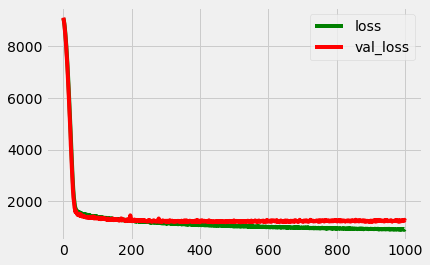

In [88]:
plot_loss_curves(history6)